# **Email/SMS Spam Classification Project**

# Import the Libraries

In [291]:
import numpy as np
import pandas as pd

# Load the Dataset

In [292]:
df = pd.read_csv("/content/drive/MyDrive/Machine_Learning_Projects/Email SMS_Spam_Project/spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [293]:
# count how many rows and columns

df.shape

(5572, 5)

## 1. Data Cleaning

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [295]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [296]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [297]:
# Renaming the columns

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [298]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [299]:
df['Target'] = encoder.fit_transform(df['Target'])

In [300]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [301]:
# missing values

df.isnull().sum()

,0
Target,0
Text,0


In [302]:
# check for duplicate values

df.duplicated().sum()

np.int64(403)

In [303]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [304]:
df.shape

(5169, 2)

#2. EDA (Exploratory Data Analysis)




In [305]:
df['Target'].value_counts()

,count
Target,
0,4516
1,653


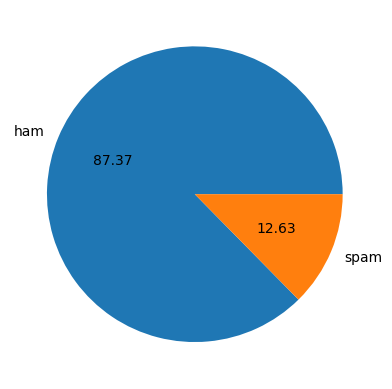

In [306]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# Data is Imbalance

In [307]:
# nltk (Natural Language Toolkit)
import nltk

In [308]:
nltk.download('punkt')
# nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [309]:
# Count Number of Characters in Text column

df['num_characters']= df['Text'].apply(len)

In [310]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [311]:
# Count Number of Words

df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [312]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [313]:
# Count Number of Sentences

df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [314]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [315]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [316]:
# ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [317]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [318]:
import seaborn as sns

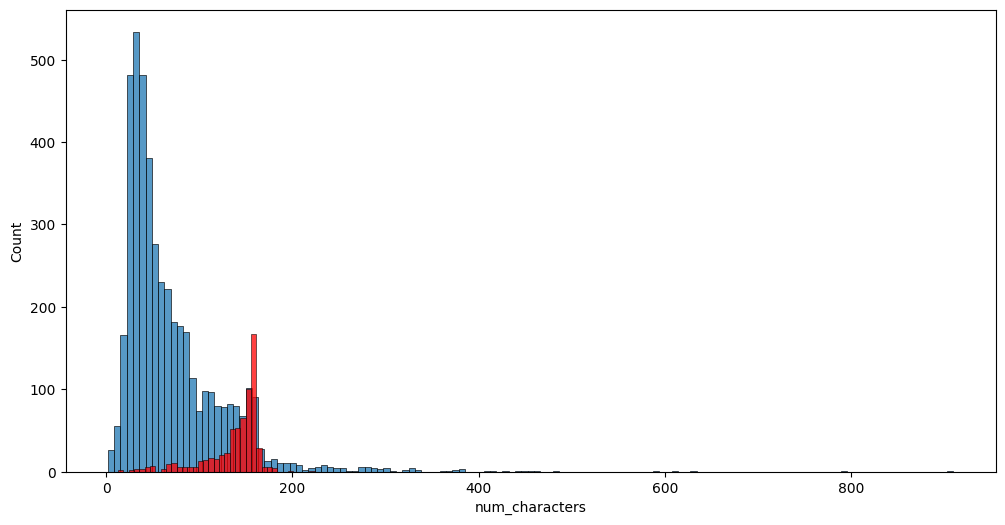

In [319]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')
plt.show()

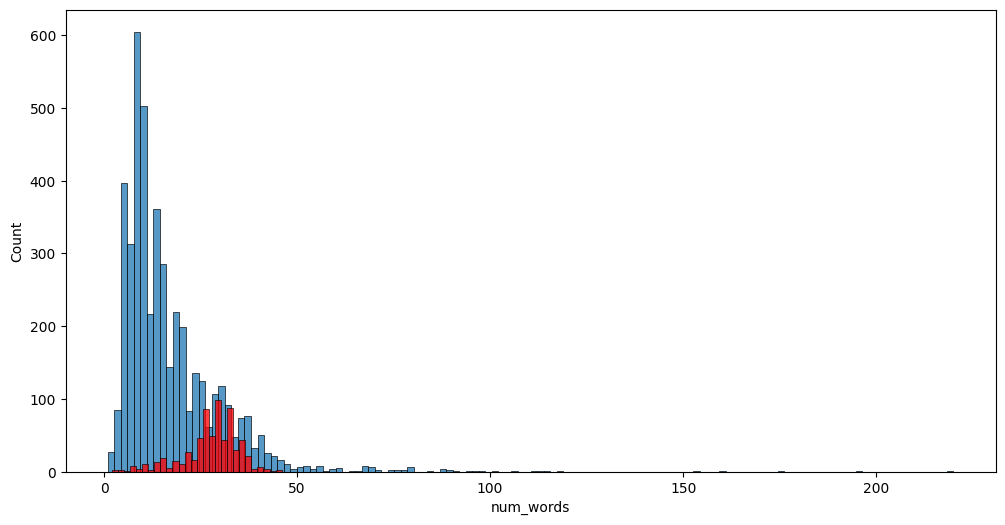

In [320]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')
plt.show()

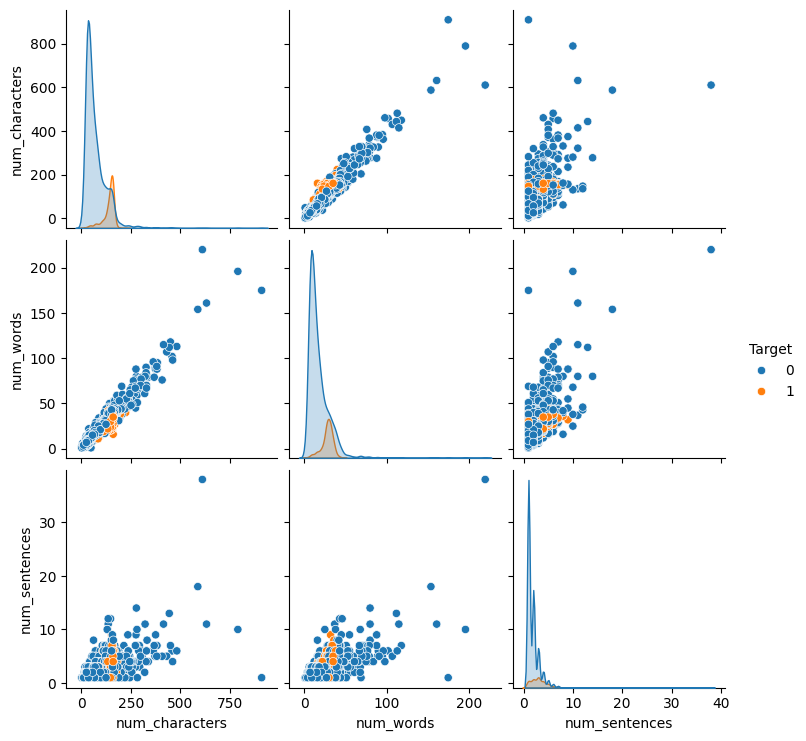

In [321]:
sns.pairplot(df,hue='Target')
plt.show()

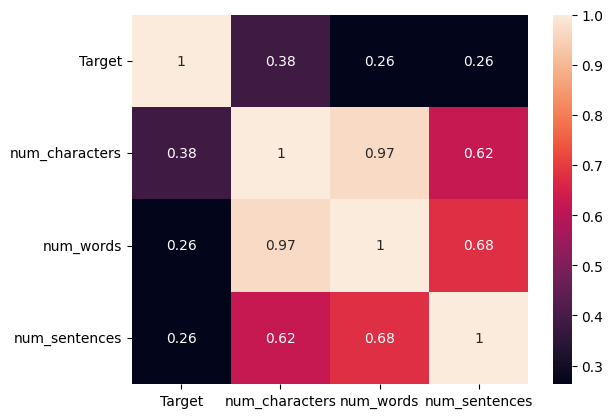

In [322]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

#3. Text Preprocessing

In [323]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
# import nltk
# nltk.download('stopwords')

In [324]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('linking')

'link'

In [325]:
# Remove Stopwords
transform_text('Hello How are You  Sankesh ?')

'hello sankesh'

In [326]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [327]:
df

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [328]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [329]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

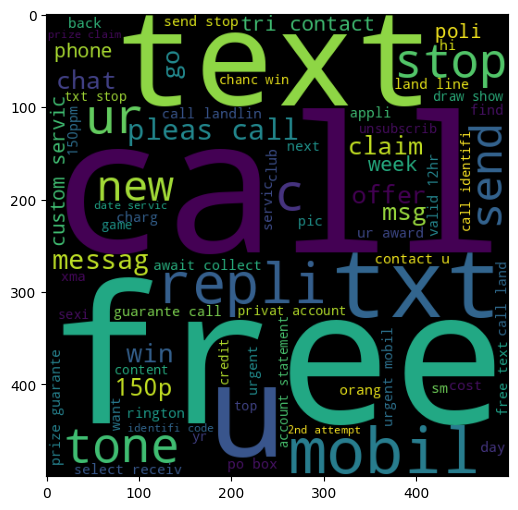

In [330]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [331]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

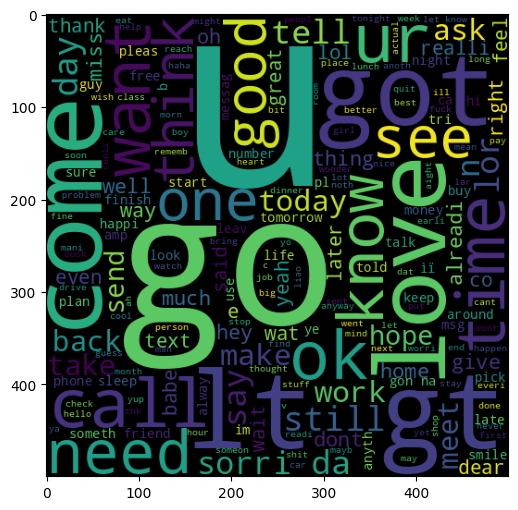

In [333]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [334]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [335]:
len(spam_corpus)

9939

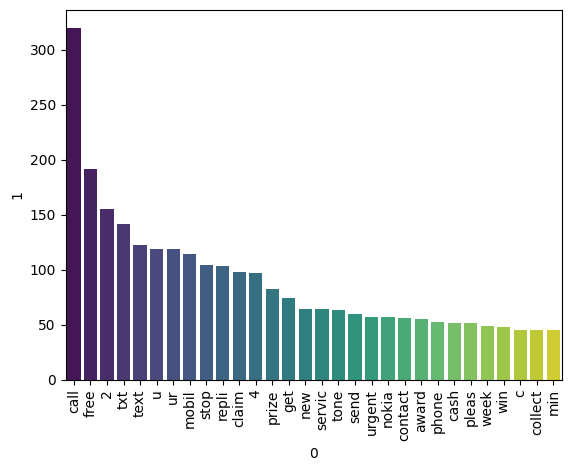

In [337]:
from collections import Counter
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(
    data=top_words,
    x=0,
    y=1,
    hue=0,          # x ko hi hue bana diya
    palette="viridis",
    legend=False    # legend hide kar diya
)

plt.xticks(rotation=90)
plt.show()

In [341]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [342]:
len(ham_corpus)

35404

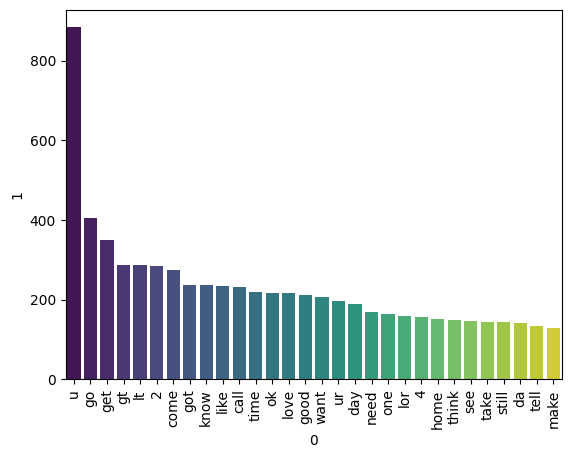

In [343]:
from collections import Counter
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(
    data=top_words,
    x=0,
    y=1,
    hue=0,          # x ko hi hue bana diya
    palette="viridis",
    legend=False    # legend hide kar diya
)

plt.xticks(rotation=90)
plt.show()

#4. Model Building




In [381]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [382]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [ ]:
# appending the num_character col to X
# x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [383]:
x.shape

(5169, 3000)

In [384]:
y= df['Target'].values

In [385]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [386]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=2)

In [387]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [388]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [389]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [390]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [354]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf --> MNB

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [356]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [357]:
clfs = {
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'LRC' : lrc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC'  : bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'XGB' : xgb
}

In [358]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [359]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [360]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
  print("For ",name)
  print("Accuracy =  ",current_accuracy)
  print("Precision = ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy =   0.9758220502901354
Precision =  0.9747899159663865
For  KNC
Accuracy =   0.9052224371373307
Precision =  1.0
For  MNB
Accuracy =   0.9709864603481625
Precision =  1.0
For  DTC
Accuracy =   0.9332688588007737
Precision =  0.8415841584158416
For  LRC
Accuracy =   0.9555125725338491
Precision =  0.96
For  RFC
Accuracy =   0.9738878143133463
Precision =  0.9826086956521739
For  ABC
Accuracy =   0.9216634429400387
Precision =  0.8202247191011236
For  BC
Accuracy =   0.9584139264990329
Precision =  0.8682170542635659
For  ETC
Accuracy =   0.9748549323017408
Precision =  0.9745762711864406
For  GBDT
Accuracy =   0.9506769825918762
Precision =  0.9306930693069307
For  XGB
Accuracy =   0.9680851063829787
Precision =  0.9487179487179487


In [361]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [362]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.905222,1.000000
2,MNB,0.970986,1.000000
5,RFC,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LRC,0.955513,0.960000
10,XGB,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BC,0.958414,0.868217
3,DTC,0.933269,0.841584


In [363]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [364]:
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.905222
1,MNB,Accuracy,0.970986
2,RFC,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LRC,Accuracy,0.955513
6,XGB,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BC,Accuracy,0.958414
9,DTC,Accuracy,0.933269


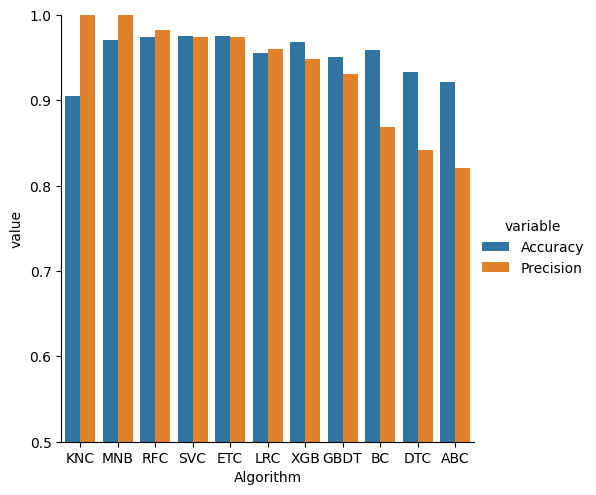

In [365]:
sns.catplot(x='Algorithm',y='value',
            hue = 'variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# Model Improve
# 1. Change the max_features parameter of tfidf

In [366]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [367]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KNC,0.905222,1.000000,0.905222,1.000000
1,MNB,0.970986,1.000000,0.970986,1.000000
2,RFC,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LRC,0.955513,0.960000,0.955513,0.960000
6,XGB,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,BC,0.958414,0.868217,0.958414,0.868217
9,DTC,0.933269,0.841584,0.933269,0.841584


In [368]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [369]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [370]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [371]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KNC,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,MNB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RFC,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LRC,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,XGB,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DTC,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [372]:
# Votting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [373]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [374]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [375]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [376]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9836065573770492


In [377]:
# Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [378]:
from sklearn.ensemble import StackingClassifier

In [379]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [380]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [391]:
import pickle

pickle.dump(mnb, open('/content/drive/MyDrive/Machine_Learning_Projects/Email SMS_Spam_Project/model.pkl','wb'))
pickle.dump(tfidf, open('/content/drive/MyDrive/Machine_Learning_Projects/Email SMS_Spam_Project/vectorizer.pkl','wb'))